<a href="https://colab.research.google.com/github/ertgrulyksk/Top-100-YouTube-100-Channel-EDA/blob/main/Top_100_YouTube_100_Channel_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
df = pd.read_csv('Top YouTube Channels Data .csv')

In [3]:
df.head()

,rank,youtuber,subscribers,video views,video count,category,started
0,1,T-Series,213000000,"188,073,919,029",16708.0,Music,2006
1,2,YouTube Movies,150000000,"167,122,746,349",NaN,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,133000000,"126,822,520,940",751.0,Education,2006
3,4,SET India,131000000,"101,541,977,714",78334.0,Shows,2006
4,5,Music,116000000,"78,437,871,689",NaN,Music,2013


In [4]:
df.sample()

,rank,youtuber,subscribers,video views,video count,category,started
8,9,Gaming,92100000,"71,692,471,446",NaN,Gaming,2013


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          100 non-null    int64  
 1   youtuber      100 non-null    object 
 2   subscribers   100 non-null    int64  
 3   video views   100 non-null    object 
 4   video count   95 non-null     float64
 5   category      100 non-null    object 
 6   started       100 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.6+ KB


In [6]:
df.describe()

,rank,subscribers,video count,started
count,100.000000,1.000000e+02,95.000000,100.000000
mean,50.500000,5.336300e+07,15847.221053,2010.800000
std,29.011492,2.869713e+07,40955.200388,5.504819
min,1.000000,3.220000e+07,45.000000,1970.000000
25%,25.750000,3.620000e+07,393.500000,2007.750000
50%,50.500000,4.320000e+07,1139.000000,2012.000000
75%,75.250000,5.710000e+07,4986.000000,2014.000000
max,100.000000,2.130000e+08,209351.000000,2018.000000


In [7]:
df.shape

(100, 7)

In [8]:
df.isna().any()

rank            False
youtuber        False
subscribers     False
video views     False
video count      True
category        False
started         False
dtype: bool

In [9]:
df.isnull().sum().sort_values(ascending = False)

video count     5
rank            0
youtuber        0
subscribers     0
video views     0
category        0
started         0
dtype: int64

In [12]:
df.dropna(axis=0, inplace=True)

In [13]:
df.shape

(95, 7)

In [14]:
df.columns

Index(['rank ', 'youtuber', 'subscribers ', 'video views ', 'video count ',
       'category ', 'started '],
      dtype='object')

In [15]:
df.rename(columns = lambda x: x.strip(), inplace=True)
df.columns

Index(['rank', 'youtuber', 'subscribers', 'video views', 'video count',
       'category', 'started'],
      dtype='object')

In [16]:
#converting the datatypes

df['video count'] = df['video count'].astype(int)
df['video views'] = df['video views'].str.replace(',','')
df['video views'] = df['video views'].astype('int64')

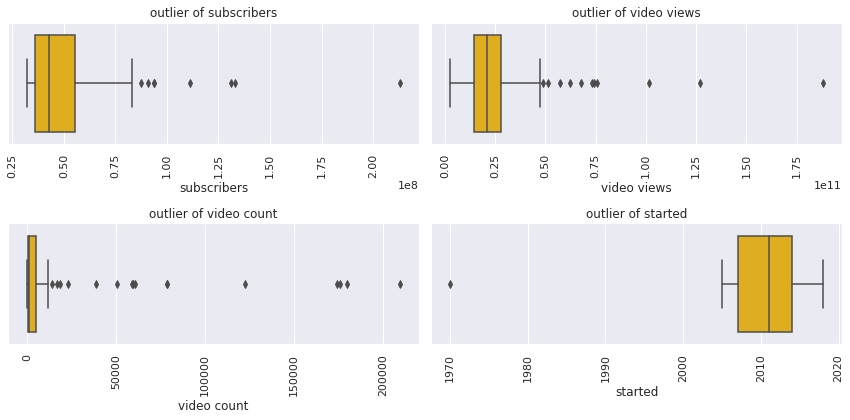

In [17]:
int_cols = ['subscribers', 'video views', 'video count', 'started']

def data_outliers(x,fig):
    plt.subplot(2,2,fig)
    plt.title('outlier of ' + x)
    sns.boxplot(x=df[x], palette=("Wistia"))
    plt.xticks(rotation = 90)
    
plt.figure(figsize= (12,6))
for e, i in enumerate(int_cols):
    data_outliers(i,e+1)
    
plt.tight_layout()
plt.show();

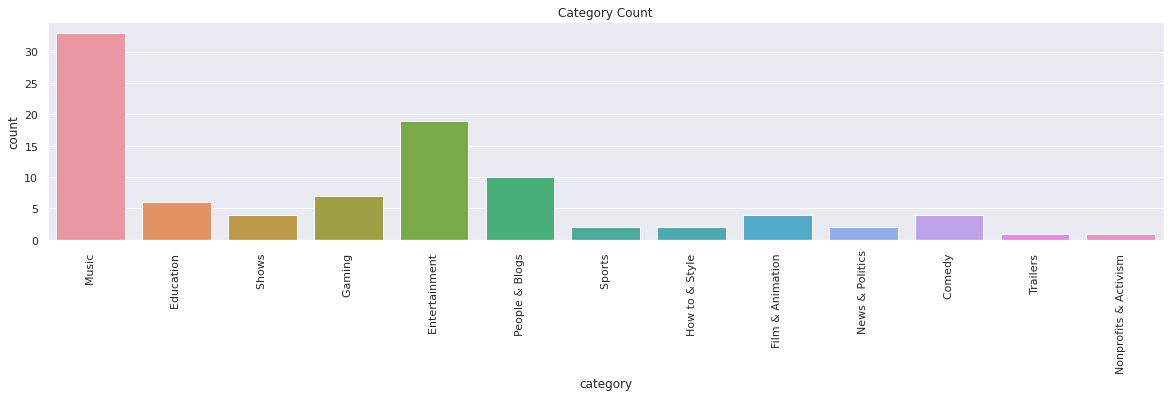

In [18]:
plt.figure(figsize=(20,4))
c = sns.countplot(x ="category", data= df, )
plt.title('Category Count')
c.set_xticklabels(c.get_xticklabels(), rotation=90)
plt.show()

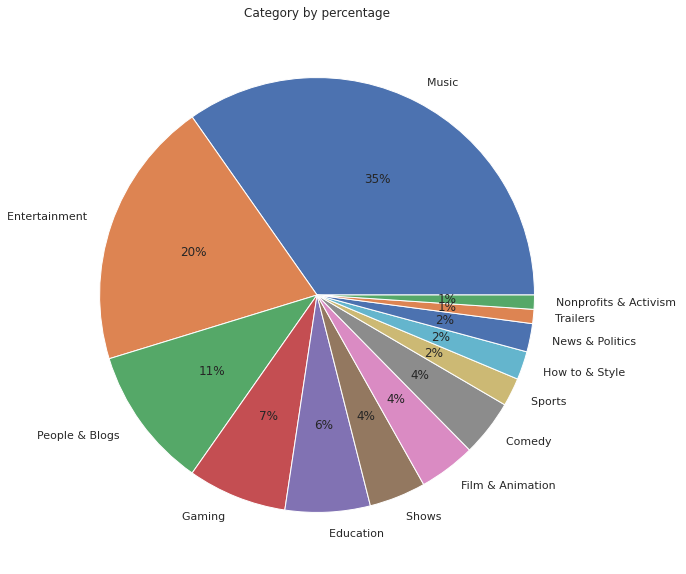

In [19]:
category_df =df['category'].value_counts()
plt.figure(figsize=(20,10))

plt.pie(x = category_df.values, labels = category_df.index, autopct="%.0f%%")
plt.title("Category by percentage")
plt.show()

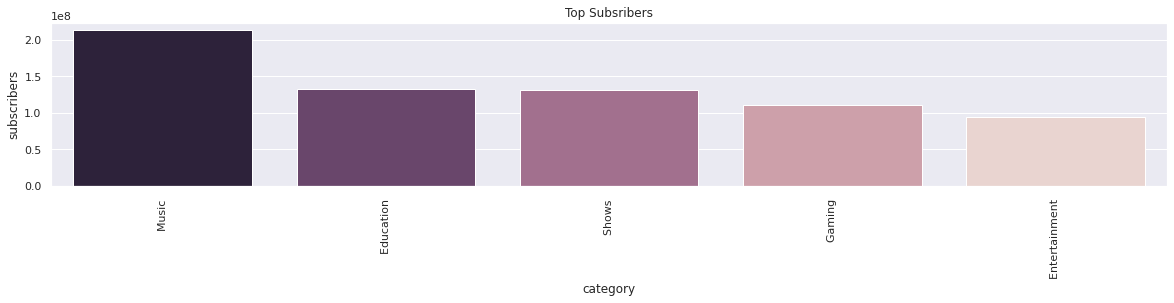

In [20]:
subscribers_df = df.sort_values('subscribers',ascending=False)
subscribers_df = subscribers_df[:5]
plt.figure(figsize=(20,3))
s = sns.barplot(x= 'category', y = 'subscribers', data= subscribers_df, palette = "ch:30_r")
plt.title("Top Subsribers")
s.set_xticklabels(s.get_xticklabels(),rotation = 90)
plt.show()

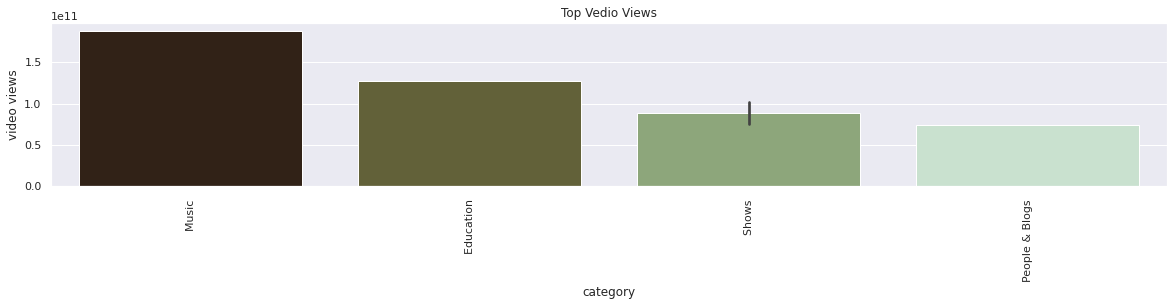

In [21]:
vedio_views_df = df.sort_values('video views', ascending= False)
vedio_views_df = vedio_views_df[:5]
plt.figure(figsize=(20,3))
d = sns.barplot(x = 'category', y = 'video views', data = vedio_views_df, palette= "ch:25_r" )
plt.title("Top Vedio Views")
d.set_xticklabels(d.get_xticklabels(),rotation = 90)
plt.show()

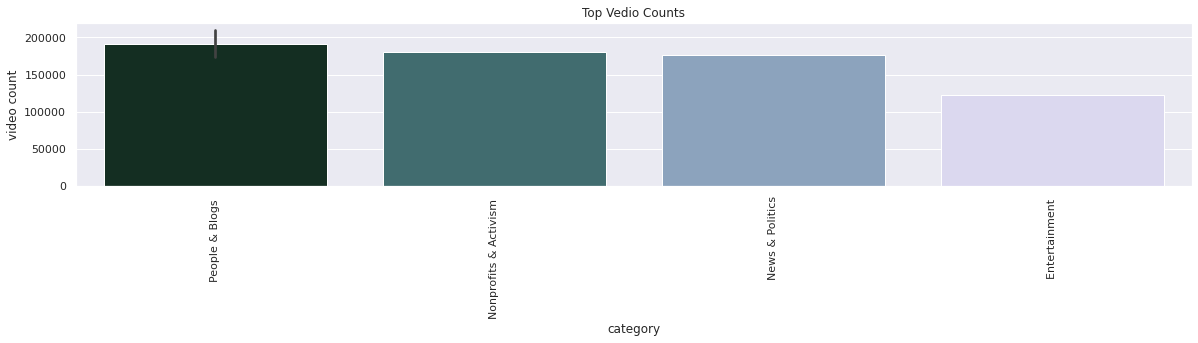

In [22]:
vedio_count_df = df.sort_values('video count', ascending=False)
vedio_count_df = vedio_count_df[:5]
plt.figure(figsize=(20,3))
v = sns.barplot(x = 'category', y = 'video count', data= vedio_count_df, palette = "ch:20_r")
plt.title('Top Vedio Counts')
v.set_xticklabels(v.get_xticklabels(),rotation = 90)
plt.show()

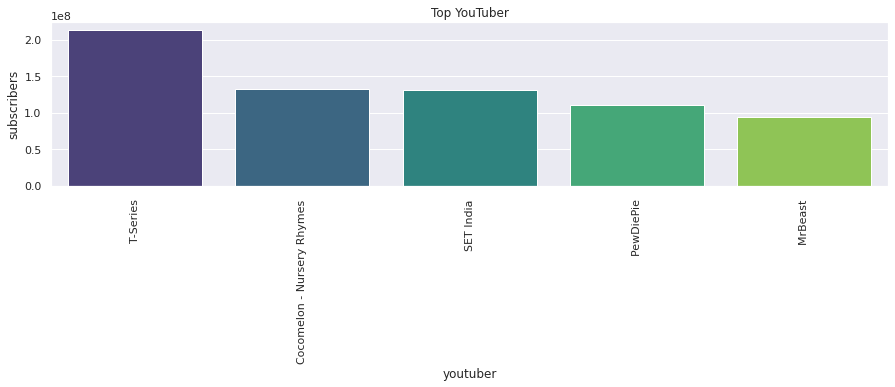

In [23]:
subscribers_df = df.sort_values('subscribers',ascending=False)
subscribers_df = subscribers_df[:5]

plt.figure(figsize=(15,3))
a = sns.barplot( x ='youtuber', y ='subscribers',data= subscribers_df, palette='viridis')
plt.title("Top YouTuber")
a.set_xticklabels(a.get_xticklabels(),rotation = 90)
plt.show()

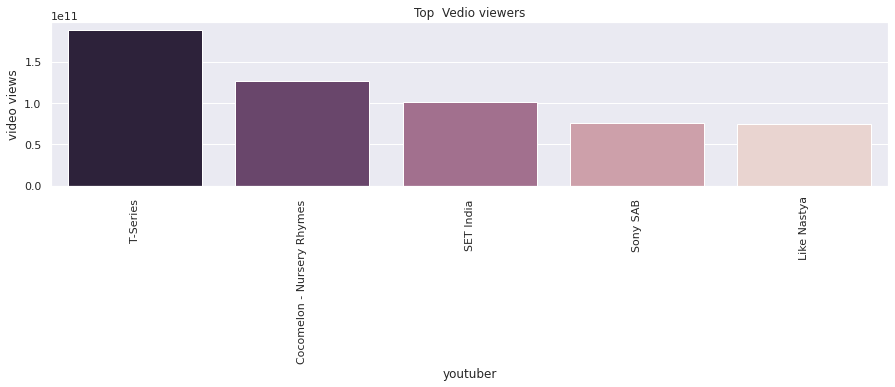

In [24]:
vedio_views_df = df.sort_values('video views',ascending=False)
vedio_views_df = vedio_views_df[:5]

plt.figure(figsize=(15,3))
b = sns.barplot(x='youtuber',y='video views', data = vedio_views_df, palette = 'ch:30_r')
plt.title("Top  Vedio viewers")
b.set_xticklabels(b.get_xticklabels(),rotation = 90)
plt.show()

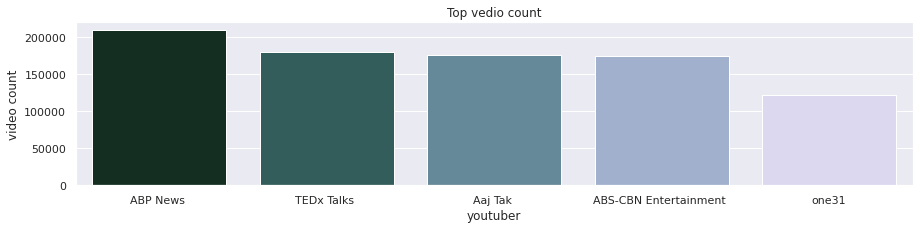

In [25]:
vedio_count_df = df.sort_values('video count',ascending=False)
vedio_count_df = vedio_count_df[:5]

plt.figure(figsize=(15,3))
d= sns.barplot(x='youtuber',y='video count', data= vedio_count_df, palette = "ch:20_r")
plt.title("Top vedio count")
b.set_xticklabels(b.get_xticklabels(),rotation = 90)
plt.show()

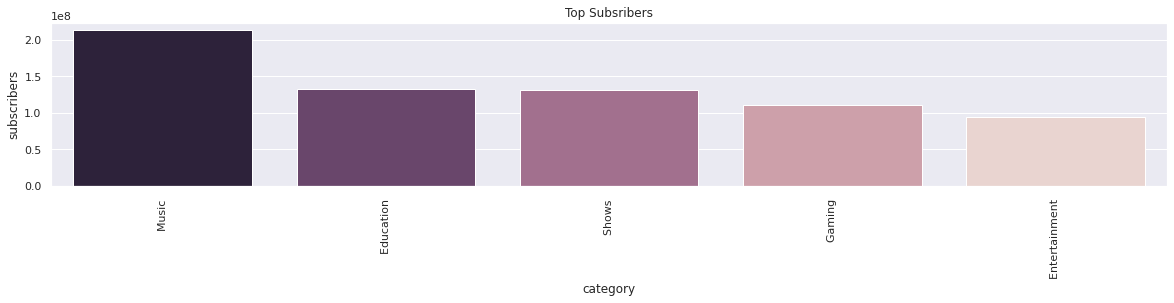

In [26]:
subscribers_df = df.sort_values('subscribers',ascending=False)
subscribers_df = subscribers_df[:5]
plt.figure(figsize=(20,3))
s = sns.barplot(x= 'category', y = 'subscribers', data= subscribers_df, palette = "ch:30_r")
plt.title("Top Subsribers")
s.set_xticklabels(s.get_xticklabels(),rotation = 90)
plt.show()

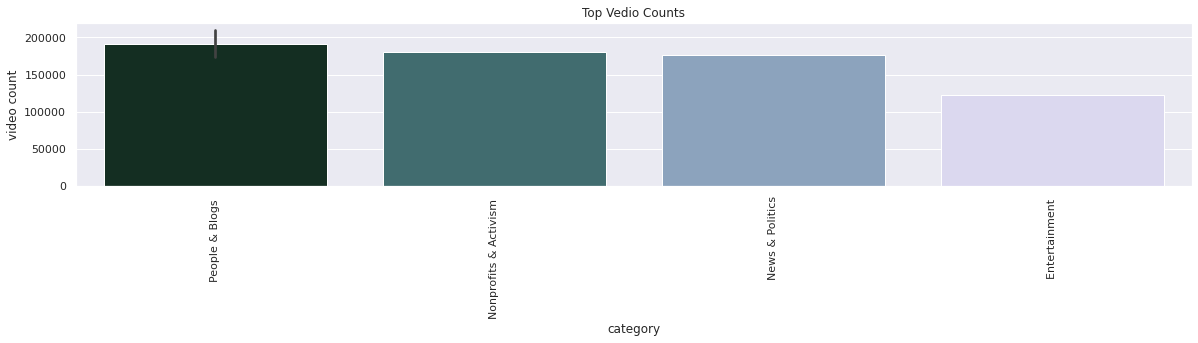

In [27]:
vedio_count_df = df.sort_values('video count', ascending=False)
vedio_count_df = vedio_count_df[:5]
plt.figure(figsize=(20,3))
v = sns.barplot(x = 'category', y = 'video count', data= vedio_count_df, palette = "ch:20_r")
plt.title('Top Vedio Counts')
v.set_xticklabels(v.get_xticklabels(),rotation = 90)
plt.show()

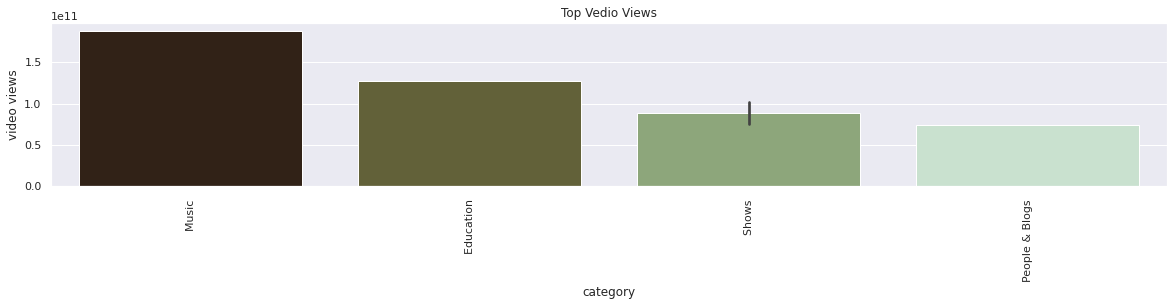

In [28]:
vedio_views_df = df.sort_values('video views', ascending= False)
vedio_views_df = vedio_views_df[:5]
plt.figure(figsize=(20,3))
d = sns.barplot(x = 'category', y = 'video views', data = vedio_views_df, palette= "ch:25_r" )
plt.title("Top Vedio Views")
d.set_xticklabels(d.get_xticklabels(),rotation = 90)
plt.show()

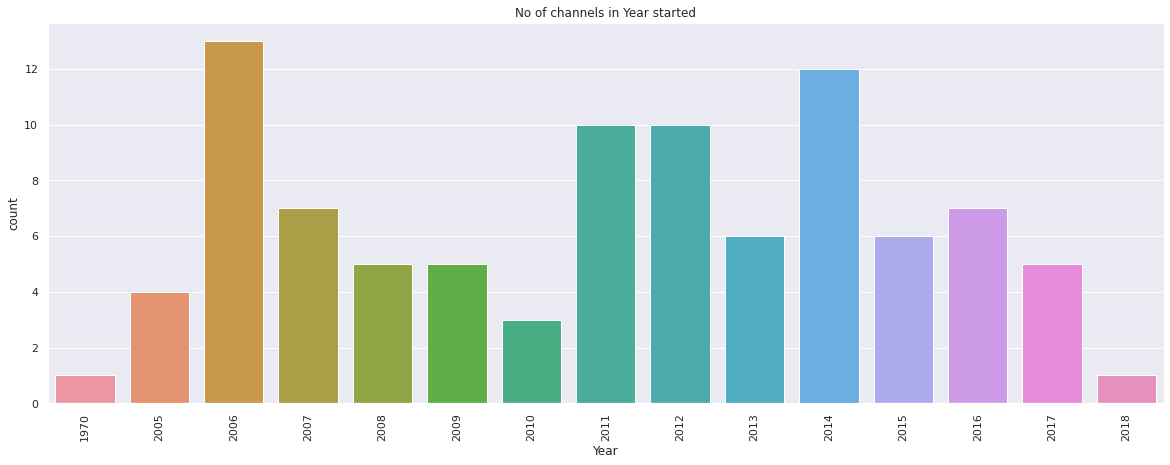

In [29]:
plt.subplots(figsize=(20,7))
sns.set_style("whitegrid")
n = sns.countplot(df['started'].astype(int),orient='v')
plt.xlabel("Year")
plt.title("No of channels in Year started")
n.set_xticklabels(n.get_xticklabels(),rotation = 90)
plt.show()

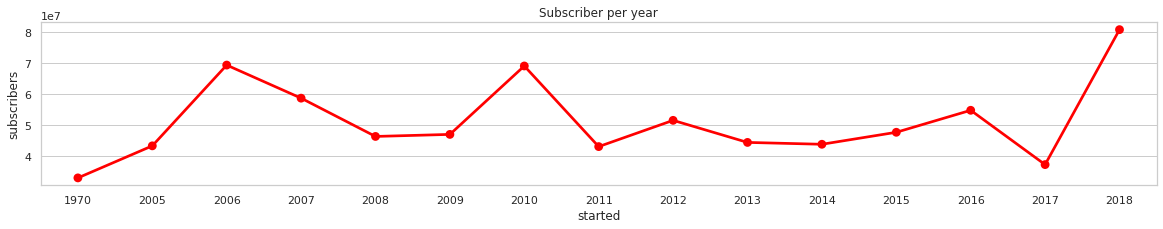

In [30]:
year_df = df.groupby("started").mean().reset_index()
plt.figure(figsize=(20,3))

sns.pointplot(x = year_df.started, y = year_df['subscribers'], color= 'red')
plt.title("Subscriber per year")
plt.show()

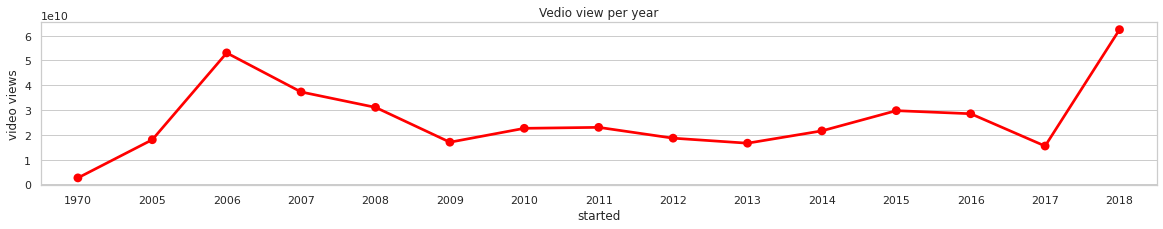

In [31]:
year_df = df.groupby("started").mean().reset_index()
plt.figure(figsize=(20,3))

sns.pointplot(x = year_df.started, y = year_df['video views'], color= 'red')
plt.title("Vedio view per year")
plt.show()

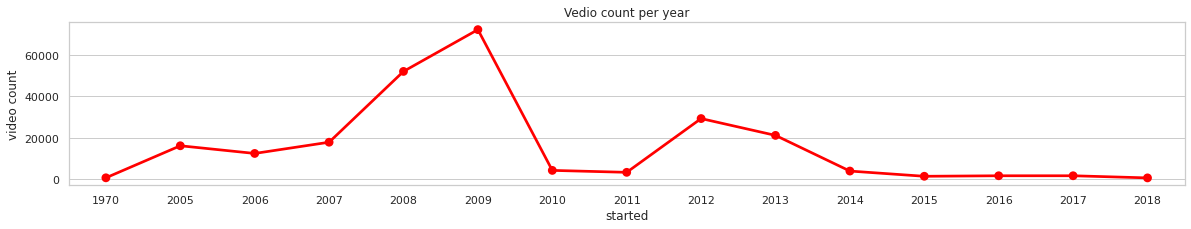

In [32]:
year_df = df.groupby("started").mean().reset_index()
plt.figure(figsize=(20,3))

sns.pointplot(x = year_df.started, y= year_df['video count'], color= 'red')
plt.title("Vedio count per year")
plt.show()